# 做出上海疫情热点图

## 数据来源 丁香园每日数据

In [1]:
import requests

*requests包简单演示*

In [2]:
response = requests.get('https://www.bilibili.com/')

## 显示中文的html
## 方法一
## 更改.enconding，后用.text
## print(response.text) 获取响应字符串
## print(response.encoding)
## 若非utf-8，则需改为utf-8
response.encoding = 'utf-8'
## print(response.encoding)

## 方法二
## 通过.content，获取响应的二进制数据，指定decode解码参数中的编码种类
## print(response.content.decode(encoding='utf8'))

print(response.text == response.content.decode())

True


In [3]:
# 案例：获取丁香园网站中防疫数据
response = requests.get('https://ncov.dxy.cn/ncovh5/view/pneumonia')
print(response.encoding)
print(response.content.decode(encoding = 'utf8'))

ISO-8859-1
<!DOCTYPE html><html lang="zh-cn" xmlns:layout="http://www.ultraq.net.nz/web/thymeleaf/layout" style="filter: none;"><head>

    <link rel="stylesheet" href="//assets.dxycdn.com/gitrepo/ncov-mobile/dist/umi.bundle.css?t=1649908567818">

    <meta charset="utf-8">
    <meta content="width=device-width,initial-scale=1,user-scalable=0,viewport-fit=cover" name="viewport">
    <meta content="#000000" name="theme-color">
    <title></title>
    <script>
        window.routerBase = "/ncovh5/view";
    </script>
<script charset="utf-8" src="//assets.dxycdn.com/gitrepo/ncov-mobile/dist/vendors~p__ECommerce~p__Pneumonia~p__Pneumonia__area~p__Pneumonia__area__index_en~p__Pneumonia__dete~e354351c.async.f15190c5.js"></script><script charset="utf-8" src="//assets.dxycdn.com/gitrepo/ncov-mobile/dist/vendors~p__Pneumonia~p__Pneumonia__area~p__Pneumonia__policy~p__Pneumonia__risk-zone~p__Pneumonia__rumor-list.async.225fd83e.js"></script><link rel="stylesheet" type="text/css" href="//assets.d

*通过 Beautiful Soup 提取数据*

In [4]:
from bs4 import BeautifulSoup

In [5]:
## 创建BeautifulSoup对象
soup = BeautifulSoup('<html>data</html>','lxml')
# bs会自动补全html格式所需的各项标签
print(soup)

<html><body><p>data</p></body></html>


In [6]:
import re

In [7]:
## 普通字符匹配
rs = re.findall('abc','abc')
print(rs)
## .号匹配
rs = re.findall('a.c','a!c')
print(rs)
## .号转义后匹配
rs = re.findall('a\.c','abc')
print(rs)
## []应用
rs = re.findall('a[bc]d','abd')
print(rs)

['abc']
['a!c']
[]
['abd']


*正则表达式常见语法*

In [8]:
## 预定义的字符集
rs = re.findall('\d\d\d','123')
print(rs)
rs = re.findall('\w','1abc你好')
print(rs)
## 数量词应用
rs = re.findall('a\d*','a123')
print(rs)
rs = re.findall('\d+','123')
print(rs)
rs = re.findall('a\d?','a123')
print(rs)
rs = re.findall('a\d{2}','a123')
print(rs)

['123']
['1', 'a', 'b', 'c', '你', '好']
['a123']
['123']
['a1']
['a12']


*re.findall()的应用*

In [9]:
## 1. findall方法，返回匹配的结果列表
rs = re.findall('\d+','tangsuqi123sqsq234')
print(rs)

['123', '234']


In [10]:
## 2.findall方法中，flag参数的作用
rs = re.findall('a.bc','a\nbc', re.DOTALL)
print(rs)
rs = re.findall('a.bc','a\nbc',re.S)
print(rs)

['a\nbc']
['a\nbc']


In [11]:
## 3.findall方法中分组的使用
rs = re.findall('a.+bc','a\nbc',re.DOTALL)
print(rs)
rs = re.findall('a(.+)bc','a\nbc',re.DOTALL)
print(rs)

['a\nbc']
['\n']


*正则表达式中的r原串的使用*

In [12]:
## 1.在不使用r原串的时候，遇到转义符怎么做
rs = re.findall('a\nbc','a\nbc')
print(rs)
rs = re.findall('a\\\\nbc','a\\nbc')
print(rs)

['a\nbc']
['a\\nbc']


In [13]:
## 2.r原串在正则中可以消除转义符带来的影响
rs = re.findall(r'a\nbc','a\nbc')
print(rs)
## 扩展：可以解决正则的时候，不符合PEP8规范的问题
rs = re.findall(r'\d','a123')
print(rs)

['a\nbc']
['1', '2', '3']


*Json模块*

* JSON与python的对应关系

* 将JSON转化为Python

In [14]:
import json

In [28]:
## 将json字符串写入test.json文件中，交给下一步操作
json_str = '''[{"ProvinceName":"America","currentConfirmedCount":1179841,"confirmedCount":1643499},
                {"ProvinceName":"Britain","currentConfirmedCount":222227,"confirmedCount":259559}]'''
with open('./test.json','w') as fp:
    fp.write(json_str)

In [29]:
## 1.把JSON字符串，转换为Python的数据
json_str = '''[{"ProvinceName":"America","currentConfirmedCount":1179841,"confirmedCount":1643499},
                {"ProvinceName":"Britain","currentConfirmedCount":222227,"confirmedCount":259559}]'''
## 转换为Python数据
rs = json.loads(json_str)
print(rs)
print(type(rs))
print(type(rs[0]))
## 2.把JSON格式文件，转化为Python类型的数据
## 构建指向该文件的文件对象
with open('./test.json', 'r') as fp:
    ##加载该文件对象，转换为Python类型的数据
    python_list = json.load(fp)
    print(python_list)
    print(type(python_list))
    print(type(python_list[0]))

[{'ProvinceName': 'America', 'currentConfirmedCount': 1179841, 'confirmedCount': 1643499}, {'ProvinceName': 'Britain', 'currentConfirmedCount': 222227, 'confirmedCount': 259559}]
<class 'list'>
<class 'dict'>
[{'ProvinceName': 'America', 'currentConfirmedCount': 1179841, 'confirmedCount': 1643499}, {'ProvinceName': 'Britain', 'currentConfirmedCount': 222227, 'confirmedCount': 259559}]
<class 'list'>
<class 'dict'>


* 将Python转换为JSON

In [31]:
## 1.把Python转换为JSON字符串，ascii码指定为False，则可以显示中文
json_str = json.dumps(rs,ensure_ascii=False) 
print(json_str)
## 2.把Python以JSON格式存储到文件中
## 构建要写入的文件对象
with open('./test1.json', 'w') as fp:
    ##把Python以JSON格式存储到文件中,ascii码指定为False，则可以显示中文
    json.dump(rs, fp)

[{"ProvinceName": "America", "currentConfirmedCount": 1179841, "confirmedCount": 1643499}, {"ProvinceName": "Britain", "currentConfirmedCount": 222227, "confirmedCount": 259559}]


#### 案例解析疫情 json字符串

In [32]:
import requests
import re
from bs4 import BeautifulSoup

In [33]:
## 发送请求，获取疫情首页内容
response = requests.get('https://ncov.dxy.cn/ncovh5/view/pneumonia')
home_page = response.content.decode()
## print(home_page)

In [34]:
## 使用BeautifulSoup获取疫情数据
soup = BeautifulSoup(home_page)
## print(soup)
## print(type(soup))
script = soup.find('script', id = 'getListByCountryTypeService2true')
print(type(script))
text = script.string
print(text)

<class 'bs4.element.Tag'>
try { window.getListByCountryTypeService2true = [{"id":15305690,"createTime":1649907641000,"modifyTime":1649907641000,"tags":"","countryType":2,"continents":"欧洲","provinceId":"5","provinceName":"法国","provinceShortName":"","cityName":"","currentConfirmedCount":26705477,"confirmedCount":27217194,"confirmedCountRank":4,"suspectedCount":0,"curedCount":368023,"deadCount":143694,"deadCountRank":10,"deadRate":"0.52","deadRateRank":164,"comment":"","sort":0,"operator":"dengyanxi","locationId":961002,"countryShortCode":"FRA","countryFullName":"France","statisticsData":"https://file1.dxycdn.com/2020/0315/929/3402160538577857318-135.json","incrVo":{"currentConfirmedIncr":190603,"confirmedIncr":190762,"curedIncr":0,"deadIncr":159},"showRank":true,"yesterdayConfirmedCount":2147383647,"yesterdayLocalConfirmedCount":2147383647,"yesterdayOtherConfirmedCount":2147383647,"highDanger":"","midDanger":"","highInDesc":"","lowInDesc":"","outDesc":""},{"id":15305699,"createTime":1649

In [35]:
## 使用正则表达式，提取json字符串
json_str = re.findall(r'\[.+\]', text)[0]
print(json_str)

[{"id":15305690,"createTime":1649907641000,"modifyTime":1649907641000,"tags":"","countryType":2,"continents":"欧洲","provinceId":"5","provinceName":"法国","provinceShortName":"","cityName":"","currentConfirmedCount":26705477,"confirmedCount":27217194,"confirmedCountRank":4,"suspectedCount":0,"curedCount":368023,"deadCount":143694,"deadCountRank":10,"deadRate":"0.52","deadRateRank":164,"comment":"","sort":0,"operator":"dengyanxi","locationId":961002,"countryShortCode":"FRA","countryFullName":"France","statisticsData":"https://file1.dxycdn.com/2020/0315/929/3402160538577857318-135.json","incrVo":{"currentConfirmedIncr":190603,"confirmedIncr":190762,"curedIncr":0,"deadIncr":159},"showRank":true,"yesterdayConfirmedCount":2147383647,"yesterdayLocalConfirmedCount":2147383647,"yesterdayOtherConfirmedCount":2147383647,"highDanger":"","midDanger":"","highInDesc":"","lowInDesc":"","outDesc":""},{"id":15305699,"createTime":1649907641000,"modifyTime":1649907641000,"tags":"","countryType":2,"continents

In [36]:
import json
## 把json字符串转换为python类型的数据、
last_day_covid = json.loads(json_str)
print(last_day_covid)

[{'id': 15305690, 'createTime': 1649907641000, 'modifyTime': 1649907641000, 'tags': '', 'countryType': 2, 'continents': '欧洲', 'provinceId': '5', 'provinceName': '法国', 'provinceShortName': '', 'cityName': '', 'currentConfirmedCount': 26705477, 'confirmedCount': 27217194, 'confirmedCountRank': 4, 'suspectedCount': 0, 'curedCount': 368023, 'deadCount': 143694, 'deadCountRank': 10, 'deadRate': '0.52', 'deadRateRank': 164, 'comment': '', 'sort': 0, 'operator': 'dengyanxi', 'locationId': 961002, 'countryShortCode': 'FRA', 'countryFullName': 'France', 'statisticsData': 'https://file1.dxycdn.com/2020/0315/929/3402160538577857318-135.json', 'incrVo': {'currentConfirmedIncr': 190603, 'confirmedIncr': 190762, 'curedIncr': 0, 'deadIncr': 159}, 'showRank': True, 'yesterdayConfirmedCount': 2147383647, 'yesterdayLocalConfirmedCount': 2147383647, 'yesterdayOtherConfirmedCount': 2147383647, 'highDanger': '', 'midDanger': '', 'highInDesc': '', 'lowInDesc': '', 'outDesc': ''}, {'id': 15305699, 'createTim

### 采集最近一日世界各国疫情数据

In [37]:
respond = requests.get('https://ncov.dxy.cn/ncovh5/view/pneumonia')
home_page =respond.content.decode()

soup = BeautifulSoup(home_page, 'lxml')
script  = soup.find(id = 'getListByCountryTypeService2true')
text = script.string
print(text)

try { window.getListByCountryTypeService2true = [{"id":15305690,"createTime":1649907641000,"modifyTime":1649907641000,"tags":"","countryType":2,"continents":"欧洲","provinceId":"5","provinceName":"法国","provinceShortName":"","cityName":"","currentConfirmedCount":26705477,"confirmedCount":27217194,"confirmedCountRank":4,"suspectedCount":0,"curedCount":368023,"deadCount":143694,"deadCountRank":10,"deadRate":"0.52","deadRateRank":164,"comment":"","sort":0,"operator":"dengyanxi","locationId":961002,"countryShortCode":"FRA","countryFullName":"France","statisticsData":"https://file1.dxycdn.com/2020/0315/929/3402160538577857318-135.json","incrVo":{"currentConfirmedIncr":190603,"confirmedIncr":190762,"curedIncr":0,"deadIncr":159},"showRank":true,"yesterdayConfirmedCount":2147383647,"yesterdayLocalConfirmedCount":2147383647,"yesterdayOtherConfirmedCount":2147383647,"highDanger":"","midDanger":"","highInDesc":"","lowInDesc":"","outDesc":""},{"id":15305699,"createTime":1649907641000,"modifyTime":164

In [38]:
json_str = re.findall(r'\[.+\]',text)
print(json_str)
last_day_covid = json.loads(json_str)
print(last_day_covid)

['[{"id":15305690,"createTime":1649907641000,"modifyTime":1649907641000,"tags":"","countryType":2,"continents":"欧洲","provinceId":"5","provinceName":"法国","provinceShortName":"","cityName":"","currentConfirmedCount":26705477,"confirmedCount":27217194,"confirmedCountRank":4,"suspectedCount":0,"curedCount":368023,"deadCount":143694,"deadCountRank":10,"deadRate":"0.52","deadRateRank":164,"comment":"","sort":0,"operator":"dengyanxi","locationId":961002,"countryShortCode":"FRA","countryFullName":"France","statisticsData":"https://file1.dxycdn.com/2020/0315/929/3402160538577857318-135.json","incrVo":{"currentConfirmedIncr":190603,"confirmedIncr":190762,"curedIncr":0,"deadIncr":159},"showRank":true,"yesterdayConfirmedCount":2147383647,"yesterdayLocalConfirmedCount":2147383647,"yesterdayOtherConfirmedCount":2147383647,"highDanger":"","midDanger":"","highInDesc":"","lowInDesc":"","outDesc":""},{"id":15305699,"createTime":1649907641000,"modifyTime":1649907641000,"tags":"","countryType":2,"continen

TypeError: the JSON object must be str, bytes or bytearray, not list

In [39]:
## 将python类型数据转换为json文件保存
with open('./test2.json','w',encoding = 'utf8') as fp:
    json.dump(last_day_covid, fp , ensure_ascii=False)

### 采集各国昨日数据

In [40]:
import re
from bs4 import BeautifulSoup
import json

In [41]:
## 针对全世界各国昨日数据最终得到保存数据的json文件“last_day_covid.json”文件
class CovidSpider(object):
    def __init__(self):
        ## 定义home_url
        self.home_url = 'https://ncov.dxy.cn/ncovh5/view/pneumonia'

    def get_content_from_url(self, url):
        ## 通过url得到网站响应并解码
        response = requests.get(url)
        return response.content.decode()

    def parse_home_page(self, home_page):
        """e
        从疫情首页提取数据
        """
        soup = BeautifulSoup(home_page, 'lxml')
        ## Soup找到各国昨日数据
        script = soup.find(id = 'getListByCountryTypeService2true')
        text = script.string
        json_str = re.findall(r'\[.+\]', text)[0]
        ## 将json格式转换为python格式
        data = json.loads(json_str)
        return data

    def save(self,data,path):
        ## 将Python格式转换为json文件
        with open(path, 'w', encoding='utf8') as fp:
            json.dump(data, fp, ensure_ascii=False)

    def crawl_last_day_covid(self):
        ## 读取该网站主页数据并解码
        home_page = self.get_content_from_url(self.home_url)
        ## 主页所需各国昨日数据转为python形式并以data变量输出
        last_day_covid = self.parse_home_page(home_page)
        ##将data变量转换为json文件并保存
        self.save(last_day_covid, './last_day_covid.json')
    def run(self):
        ## 定义函数运行方式
        self.crawl_last_day_covid()

if __name__ == '__main__':
    spider = CovidSpider()
    spider.run()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_json('./last_day_covid.json')

In [46]:
data.shape()

TypeError: 'tuple' object is not callable

### 采集各国1月23日以来的疫情数据

In [3]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
import json
import requests

In [4]:
class CovidSpider(object):
    def __init__(self):
        ## 设定home_url
        self.home_url = 'https://ncov.dxy.cn/ncovh5/view/pneumonia'

    def get_content_from_url(self, url):
        ## 获取主页信息并解码
        response = requests.get(url)
        return response.content.decode()

    def parse_home_page(self, home_page):
        """
        从疫情首页提取数据————各国数据
        """
        soup = BeautifulSoup(home_page, 'lxml')
        script = soup.find(id = 'getListByCountryTypeService2true')
        text = script.string
        json_str = re.findall(r'\[.+\]', text)[0]
        data = json.loads(json_str)
        return data

    def save(self,data,path):
        with open(path, 'w', encoding='utf8') as fp:
            json.dump(data, fp, ensure_ascii=False)

    def crawl_last_day_covid(self):
        home_page = self.get_content_from_url(self.home_url)
        last_day_covid = self.parse_home_page(home_page)
        self.save(last_day_covid, './last_day_covid.json')
        
    def crawl_covid_13(self):
        """
        采集从1月23号以来的各国疫情数据
        """
        with open('./last_day_covid.json',encoding='utf8') as fp:
            last_day_covid = json.load(fp)
        covid = []
        for country in tqdm(last_day_covid, '采集1月23号以来各国疫情信息'):
            statistics_data_url = country['statisticsData']
            statistics_data_json_str = self.get_content_from_url(statistics_data_url)
            statistics_data = json.loads(statistics_data_json_str)['data']
            for one_day in statistics_data:
                one_day['proviceName'] = country['provinceName']
                one_day['countryShortCode'] = country['countryShortCode']
                
            covid.extend(statistics_data)
    def run(self):
    ## 定义函数运行方式
       # self.crawl_last_day_covid()
        self.crawl_covid_13()
if __name__ == '__main__':
    spider = CovidSpider()
    spider.run()

采集1月23号以来各国疫情信息: 100%|██████████| 215/215 [00:17<00:00, 12.47it/s]


In [5]:
import numpy as np
import pandas as pd

In [11]:
data = pd.read_json('./last_day_covid.json',orient='records')
data.shape

(215, 36)

In [12]:
data.head()

,id,createTime,modifyTime,tags,countryType,continents,provinceId,provinceName,provinceShortName,cityName,...,incrVo,showRank,yesterdayConfirmedCount,yesterdayLocalConfirmedCount,yesterdayOtherConfirmedCount,highDanger,midDanger,highInDesc,lowInDesc,outDesc
0,15305690.0,1.649908e+12,1.649908e+12,,2,欧洲,5,法国,,,...,"{'currentConfirmedIncr': 190603, 'confirmedInc...",True,2147383647,2147383647,2147383647,,,,,
1,15305699.0,1.649908e+12,1.649908e+12,,2,欧洲,10,德国,,,...,"{'currentConfirmedIncr': 138290, 'confirmedInc...",True,2147383647,2147383647,2147383647,,,,,
2,15305692.0,1.649908e+12,1.649908e+12,,2,亚洲,7,韩国,,,...,"{'currentConfirmedIncr': 195186, 'confirmedInc...",True,2147383647,2147383647,2147383647,,,,,
3,15305799.0,1.649908e+12,1.649908e+12,,2,欧洲,10,英国,,,...,"{'currentConfirmedIncr': 38269, 'confirmedIncr...",True,2147383647,2147383647,2147383647,,,,,
4,15305707.0,1.649908e+12,1.649908e+12,,2,欧洲,10,西班牙,,,...,"{'currentConfirmedIncr': 34565, 'confirmedIncr...",True,2147383647,2147383647,2147383647,,,,,


### 采集最近一日全国各省疫情数据

In [9]:
class CovidSpider(object):
    def __init__(self):
        self.home_url = 'https://ncov.dxy.cn/ncovh5/view/pneumonia'

    def get_content_from_url(self, url):
        """
        读取主页并解码
        """
        response = requests.get(url)
        return response.content.decode()

    def parse_home_page(self, home_page, tag_id):
        """
        从疫情首页提取数据
        """
        soup = BeautifulSoup(home_page, 'lxml')
        script = soup.find(id = tag_id)
        text = script.string
        json_str = re.findall(r'\[.+\]', text)[0]
        data = json.loads(json_str)
        return data

    def save(self,data,path):
        with open(path, 'w', encoding='utf8') as fp:
            json.dump(data, fp, ensure_ascii=False)
            
    ### def crawl_last_day_covid(self):
        ## 读取该网站主页数据并解码
        ###home_page = self.get_content_from_url(self.home_url)
        ## 主页所需各国昨日数据转为python形式并以data变量输出
        ### last_day_covid = self.parse_home_page(home_page, tag_id = 'getListByCountryTypeService2true')
        ##将data变量转换为json文件并保存
        ### self.save(last_day_covid, './last_day_covid.json')

    def crawl_last_day_covid_china(self):
        home_page = self.get_content_from_url(self.home_url)
        data = self.parse_home_page(home_page, tag_id = 'getAreaStat')
        ### 重构代码 提高复用性
        ### soup = BeautifulSoup(home_page, 'lxml')
        ### script = soup.find(id = 'getAreaStat')
        ### text = script.string
        ### json_str = re.findall(r'\[.+\]', text)[0]
        ### data = json.loads(json_str)
        self.save(data, './crawl_last_day_covid_china.json')
    def run(self):
        self.crawl_last_day_covid_china()
    
if __name__ == '__main__':
    spider = CovidSpider()
    spider.run()

In [13]:
num_casechina = pd.read_json('./crawl_last_day_covid_china.json', orient='records')

In [17]:
num_casechina.columns

Index(['provinceName', 'provinceShortName', 'currentConfirmedCount',
       'confirmedCount', 'suspectedCount', 'curedCount', 'deadCount',
       'comment', 'locationId', 'statisticsData', 'highDangerCount',
       'midDangerCount', 'detectOrgCount', 'vaccinationOrgCount', 'cities',
       'dangerAreas'],
      dtype='object')

In [20]:
num_casechina.head()

,provinceName,provinceShortName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,locationId,statisticsData,highDangerCount,midDangerCount,detectOrgCount,vaccinationOrgCount,cities,dangerAreas
0,香港,香港,236134,308847,181,63711,9002,,810000,https://file1.dxycdn.com/2020/0223/331/3398299...,0,0,0,0,[],[]
1,台湾,台湾,15978,30574,485,13742,854,,710000,https://file1.dxycdn.com/2020/0223/045/3398299...,0,0,0,0,[],[]
2,上海市,上海,12307,20246,393,7932,7,因未公布分区死亡和治愈，仅展示累计确诊和现存确诊,310000,https://file1.dxycdn.com/2020/0223/128/3398299...,0,13,130,17,"[{'cityName': '浦东新区', 'currentConfirmedCount':...","[{'cityName': '浦东新区', 'areaName': '北蔡镇联勤村冯桥南宅'..."
3,吉林省,吉林,10645,38800,19,28150,5,,220000,https://file1.dxycdn.com/2020/0223/046/3398299...,6,86,91,0,"[{'cityName': '长春', 'currentConfirmedCount': 6...","[{'cityName': '吉林市', 'areaName': '昌邑区桦皮厂镇桦皮厂社区..."
4,浙江省,浙江,754,2876,68,2121,1,2月10日通报核减的12例在浙江省治愈的外省病例，根据国家最新要求重新纳入累计病例。,330000,https://file1.dxycdn.com/2020/0223/537/3398299...,0,0,519,217,"[{'cityName': '境外输入', 'currentConfirmedCount':...",[]


### 采集1月22日以来的全国各省疫情数据

In [21]:
class CovidSpider(object):
    """
    包含整体四个文件，集合版
    """
    def __init__(self):
        self.home_url = 'https://ncov.dxy.cn/ncovh5/view/pneumonia'

    def get_content_from_url(self, url):
        response = requests.get(url)
        return response.content.decode()

    def parse_home_page(self, home_page, tag_id):
        """
        从疫情首页提取数据
        """
        soup = BeautifulSoup(home_page, 'lxml')
        script = soup.find(id = tag_id)
        text = script.string
        json_str = re.findall(r'\[.+\]', text)[0]
        data = json.loads(json_str)
        return data
    
    def load(self, path):
        """
        根据路径加载数据
        """
        with open(path, encoding='utf8') as fp:
            data = json.load(fp)
        return data

    def save(self,data,path):
        with open(path, 'w', encoding='utf8') as fp:
            json.dump(data, fp, ensure_ascii=False)
            
    def crawl_last_day_covid(self):
        ## 读取该网站主页数据并解码
        home_page = self.get_content_from_url(self.home_url)
        ## 主页所需各国昨日数据转为python形式并以data变量输出
        last_day_covid = self.parse_home_page(home_page, tag_id = 'getListByCountryTypeService2true')
        ##将data变量转换为json文件并保存
        self.save(last_day_covid, './last_day_covid.json')

    def crawl_last_day_covid_china(self):
        home_page = self.get_content_from_url(self.home_url)
        data = self.parse_home_page(home_page, tag_id = 'getAreaStat')
        ### 重构代码 提高复用性
        ### soup = BeautifulSoup(home_page, 'lxml')
        ### script = soup.find(id = 'getAreaStat')
        ### text = script.string
        ### json_str = re.findall(r'\[.+\]', text)[0]
        ### data = json.loads(json_str)
        self.save(data, './crawl_last_day_covid_china.json')
        
    def crawl_covid_china_22(self):
        """
        采集从1月22日以来的全国各省疫情数据
        """
        ### 加载最近一日全国疫情信息
        last_day_covid_22 = self.load('./crawl_last_day_covid_china.json')

        ### 遍历最近一日全国疫情信息，获取各省疫情URL
        #定义列表， 用于存储各省从1月22日以来的疫情数据
        covid = []
        #遍历各省疫情数据，获取统计的URL
        for country in tqdm(last_day_covid_22, '采集1月23号以来各省疫情信息'):
            statistics_data_url = country['statisticsData']
            statistics_data_json_str = self.get_content_from_url(statistics_data_url)
            ### 解析各省疫情json字符串，并添加列表中
            statistics_data = json.loads(statistics_data_json_str)['data']
            for one_day in statistics_data:
                one_day['proviceName'] = country['provinceName']
            covid.extend(statistics_data)
            # print(covid)
        ### 以json格式保存疫情数据信息
        self.save(covid, './covid_china_22.json')
    
    def run(self):
        #self.crawl_last_day_covid_china()
        self.crawl_covid_china_22()
if __name__ == '__main__':
    spider = CovidSpider()
    spider.run()

采集1月23号以来各省疫情信息: 100%|██████████| 34/34 [00:02<00:00, 12.01it/s]


In [57]:
data_china_23 = pd.read_json('./covid_china_22.json',orient='records')
data_china_23.shape

(27124, 14)

In [63]:
data_china_23.index = data_china_23['dateId']

In [64]:
data_china_23.columns

Index(['confirmedCount', 'confirmedIncr', 'curedCount', 'curedIncr',
       'currentConfirmedCount', 'currentConfirmedIncr', 'dateId', 'deadCount',
       'deadIncr', 'highDangerCount', 'midDangerCount', 'suspectedCount',
       'suspectedCountIncr', 'proviceName'],
      dtype='object')

<AxesSubplot:xlabel='dateId'>

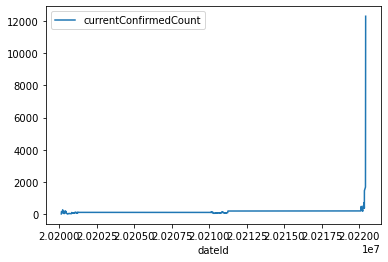

In [65]:
data_china_23[data_china_23['proviceName']=='上海市'].plot(y='currentConfirmedCount')

In [66]:
data_china_23[data_china_23['proviceName']=='上海市'].head()

,confirmedCount,confirmedIncr,curedCount,curedIncr,currentConfirmedCount,currentConfirmedIncr,dateId,deadCount,deadIncr,highDangerCount,midDangerCount,suspectedCount,suspectedCountIncr,proviceName
dateId,,,,,,,,,,,,,,
20200120,1,1,0,0,1,1,20200120,0,0,0,0,0,0,上海市
20200121,9,8,0,0,9,8,20200121,0,0,0,0,0,0,上海市
20200122,16,7,0,0,16,7,20200122,0,0,0,0,0,0,上海市
20200123,20,4,0,0,20,4,20200123,0,0,0,0,0,0,上海市
20200124,33,13,0,0,32,12,20200124,1,1,0,0,0,0,上海市


### 疫情数据可视化

In [ ]:
! conda 

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.figure
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## 根据上海地图标注

## Heatmap作图

## 做出预测